In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


____

In [2]:
ls /fs/nas14/other0/cbenitez/partsSim

info_mp_marbles_14032021-122643
info_mp_marbles_15032021-003752
MCMCrun_mp_marbles_15032021-003752_newW.npy
MCMCrun_mp_marbles_15032021-003752_ringsW2.npy
MCMCrun_mp_marbles_15032021-003752_ringsW.npy
mp_marbles_14032021-122643
mp_marbles_14032021-122643LSR
mp_marbles_14032021-122643_script.py
mp_marbles_15032021-003752
mp_marbles_15032021-003752LSR
mp_marbles_15032021-003752_MCMCacumW.npy
mp_marbles_15032021-003752_script.py


In [3]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [4]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [5]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [6]:
tt = np.unique(DFparts.creation_time)
delta_tt = np.diff(tt)
xv_LSRs = [np.array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,-7.10893683e-15,  0.00000000e+00])]
for dt in delta_tt:
    xv_LSR = xv_LSRs[-1]
    alpha = np.linalg.norm(xv_LSR[3::])/np.linalg.norm(xv_LSR[:3:])*(dt)*mt.C.Myr.express(mt.C.s)
    xv_LSR = list(oc.Rot_mat(-alpha,[0,0,1]).dot(xv_LSRs[-1][:3:]))
    xv_LSR.extend(mt.vel_circ(xv_LSR,mt.force_T))
    xv_LSR = np.array(xv_LSR)
    xv_LSRs.append(xv_LSR)

In [7]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [8]:
xv_LSRs

[array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,
        -7.10893683e-15,  0.00000000e+00]),
 array([ 7.31891031e+00, -1.61405962e-01,  0.00000000e+00, -1.56778869e-16,
        -7.10909599e-15, -0.00000000e+00]),
 array([ 7.30000000e+00, -5.50000000e-01,  0.00000000e+00, -5.34232916e-16,
        -7.09072780e-15, -0.00000000e+00]),
 array([ 7.26618505e+00, -8.91658470e-01,  0.00000000e+00, -8.66096917e-16,
        -7.05788223e-15, -0.00000000e+00]),
 array([ 7.21475414e+00, -1.24089597e+00,  0.00000000e+00, -1.20532267e-15,
        -7.00792571e-15, -0.00000000e+00]),
 array([ 7.14645945e+00, -1.58764522e+00,  0.00000000e+00, -1.54213152e-15,
        -6.94158886e-15, -0.00000000e+00])]

In [9]:
np.unique(DFparts.output)

array([11, 12, 13, 14, 15, 16])

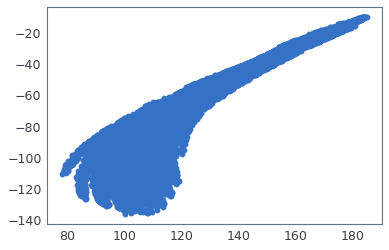

In [10]:
plt.scatter(np.sqrt(DFparts.vx**2+DFparts.vy**2)*mt.C.kpc.express(mt.C.km),DFparts.vz*mt.C.kpc.express(mt.C.km))

In [11]:
#subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & \
#                  #(DFparts.creation_time==tt[opc-11]) & \
#                  (abs(DFparts.z)<.11) & \
#                  (abs(DFparts.vz/np.sqrt(DFparts.vx**2+DFparts.vy**2))<.3)] for opc in [11,12,13,14]]

subDFs = [DFparts[(DFparts["output"]==opc) & \
                  #(DFparts.creation_time==tt[opc-11]) & \
                  (abs(DFparts.z)<.11)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

#subDFs = [DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]
##subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]
#xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
#print [len(xvd)  for xvd in xxvvdds]

[82, 1040, 2995, 3042]


_____

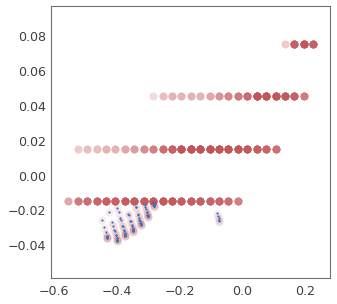

In [12]:
ioc = 0
plt.figure(figsize=(5,5))
#plt.scatter(xxvvdds[ioc][:,1],xxvvdds[ioc][:,2])
plt.scatter(xxvvdds[ioc+1][:,1],xxvvdds[ioc+1][:,2],alpha=.1,s=60,c="r")
plt.scatter(xxvvdds[ioc][:,1]+xxvvdds[ioc][:,4]*(tt[ioc+1]-tt[ioc])*mt.C.Myr.express(mt.C.s),xxvvdds[ioc][:,2]+xxvvdds[ioc][:,5]*(tt[ioc+1]-tt[ioc])*mt.C.Myr.express(mt.C.s),alpha=1,s=4)

In [13]:
(tt[ioc+1]-tt[ioc])*mt.C.Myr.express(mt.C.s)

46423112111000.0

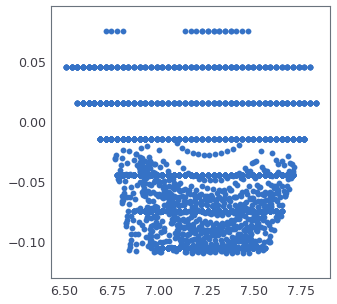

In [14]:
ioc = 2
plt.figure(figsize=(5,5))
plt.scatter(xxvvdds[ioc][:,0],xxvvdds[ioc][:,2])

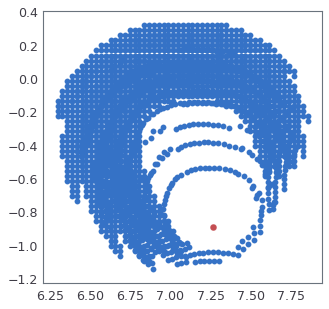

In [15]:
ioc = 3
plt.figure(figsize=(5,5))
plt.scatter(xxvvdds[ioc][:,0],xxvvdds[ioc][:,1])
plt.scatter([xv_LSRs[ioc][0]],[xv_LSRs[ioc][1]],c="r",s=40)

______

In [380]:
#subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & \
#                  #(DFparts.creation_time==tt[opc-11]) & \
#                  (abs(DFparts.z)<.11) & \
#                  (abs(DFparts.vz/np.sqrt(DFparts.vx**2+DFparts.vy**2))<.3)] for opc in [11,12,13,14]]

subDFs = [DFparts[(DFparts["output"]==opc) & \
                  #(DFparts.creation_time==tt[opc-11]) & \
                  (abs(DFparts.z)<.11)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

#subDFs = [DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]
##subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]
#xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
#print [len(xvd)  for xvd in xxvvdds]

[82, 1040, 2995, 3042]


In [381]:
ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(4):
    xv_LSR = xv_LSRs[ic]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

In [393]:
NNsteps = [5500,5800,6500,5500]
MCMCacumW = [oc.MCMCfit_extd(xxvvdds[j],xv_LSRs[j], Nsteps=NNsteps[j], Nwalkers=32) for j in range(4)]

100%|██████████| 5500/5500 [03:51<00:00, 27.79it/s]


[A,B,C,K,D,D',E,E',K']: [40.80813695129221, -27.992305395332657, 55.871661955819874, -52.36554512562148, 610.3481902865484, 588.1262976921942, -129.6243799167986, -160.9293637555856, -1467.8759805500742]


100%|██████████| 5800/5800 [35:38<00:00,  2.57it/s]


[A,B,C,K,D,D',E,E',K']: [83.14042555480253, -10.102965105104488, 83.09859737774401, -116.74271618821855, 1640.4917917066293, 1536.281129683903, -644.5797681934322, -617.3837396611431, -1385.7146036645418]


100%|██████████| 6500/6500 [1:15:05<00:00,  1.57it/s]


[A,B,C,K,D,D',E,E',K']: [-54.25526283977019, 1.0709709730300425, -72.44218497581001, 89.83850937802042, -330.7531981523179, -217.53293934278548, 148.7078429899274, 126.57552486688954, 648.4216906284809]


100%|██████████| 5500/5500 [1:02:49<00:00,  1.46it/s]


[A,B,C,K,D,D',E,E',K']: [-32.06242845378017, -4.550705137440857, -39.103495154601504, 53.73457626772212, -209.5226908730306, -143.8166056852577, 102.17892652844799, 87.01039073653779, 358.31632692610646]


In [11]:
MCMCacumW = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_acumW")

IOError: [Errno 2] No such file or directory: '/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_acumW'

In [12]:
oc.plot_fit(MCMCacumW[3])

NameError: name 'MCMCacumW' is not defined

In [430]:
np.save("/fs/nas14/other0/cbenitez/partsSim/mp_marbles_15032021-003752_MCMCacumW",MCMCacumW)

PicklingError: Can't pickle oort_cons.MCMCfit_extd: it's not the same object as oort_cons.MCMCfit_extd

______

In [22]:
#subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & \
#                  #(DFparts.creation_time==tt[opc-11]) & \
#                  (abs(DFparts.z)<.11) & \
#                  (abs(DFparts.vz/np.sqrt(DFparts.vx**2+DFparts.vy**2))<.3)] for opc in [11,12,13,14]]

subDFs = [DFparts[(DFparts["output"]==opc) & \
                  (DFparts.creation_time==tt[opc-11]) & \
                  (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

#subDFs = [DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]
##subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]
#xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
#print [len(xvd)  for xvd in xxvvdds]

[82, 958, 1940, 1692]


In [23]:
ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(4):
    xv_LSR = xv_LSRs[ic]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

100%|██████████| 5500/5500 [03:23<00:00, 27.05it/s]


[A,B,C,K,D,D',E,E',K']: [40.80813695129221, -27.992305395332657, 55.871661955819874, -52.36554512562148, 610.3481902865484, 588.1262976921942, -129.6243799167986, -160.9293637555856, -1467.8759805500742]


100%|██████████| 5800/5800 [31:21<00:00,  3.32it/s]


[A,B,C,K,D,D',E,E',K']: [72.988683423261, -11.926518352293726, 69.76458001823976, -98.17144042349862, 1648.921180868013, 1557.908306841937, -647.5265722587645, -628.9170602673695, -1393.9675351769436]


100%|██████████| 6500/6500 [56:15<00:00,  1.91it/s] 


[A,B,C,K,D,D',E,E',K']: [-56.60142600059966, 3.0453644044422137, -76.02150651034721, 97.98146529795257, -430.15237722931505, -314.5855279419415, 185.63726009543257, 158.65884234004102, 757.9894976509316]


100%|██████████| 5500/5500 [43:26<00:00,  2.13it/s]


[A,B,C,K,D,D',E,E',K']: [-34.22227235102976, -1.9806385799767512, -44.29622133393827, 57.79386903199775, -218.42570938103034, -150.70462083345885, 104.17003238811134, 86.69285654773776, 387.8324019520944]


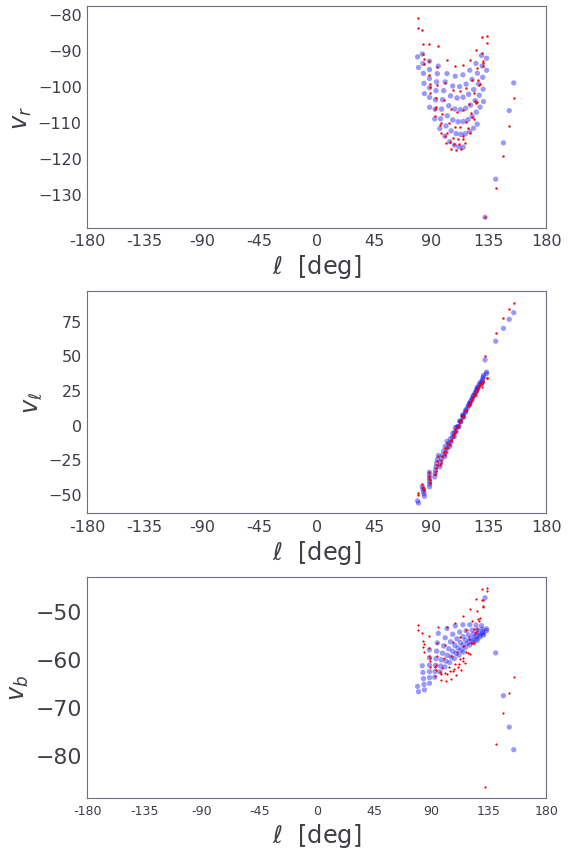

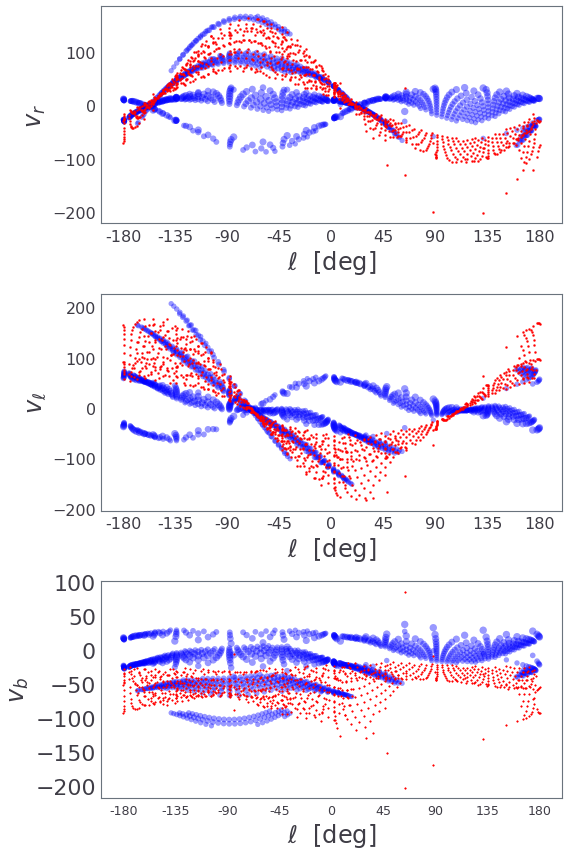

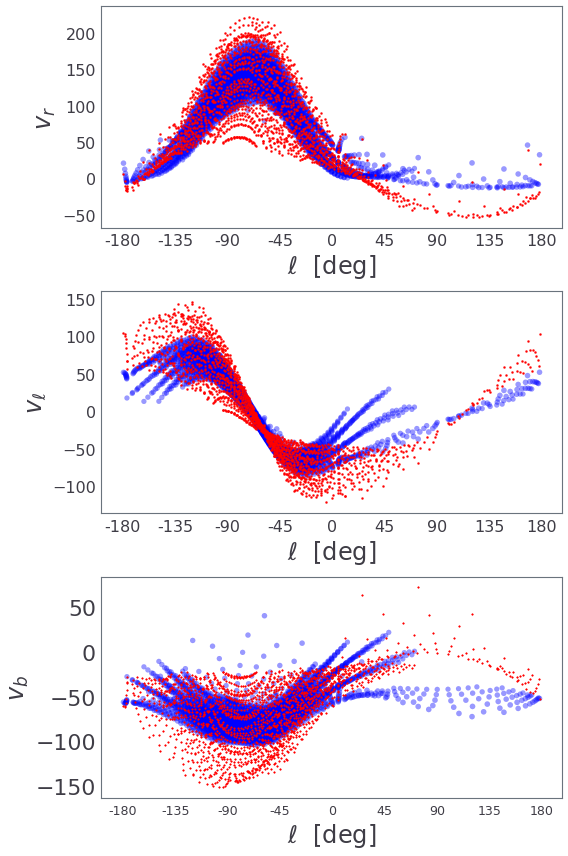

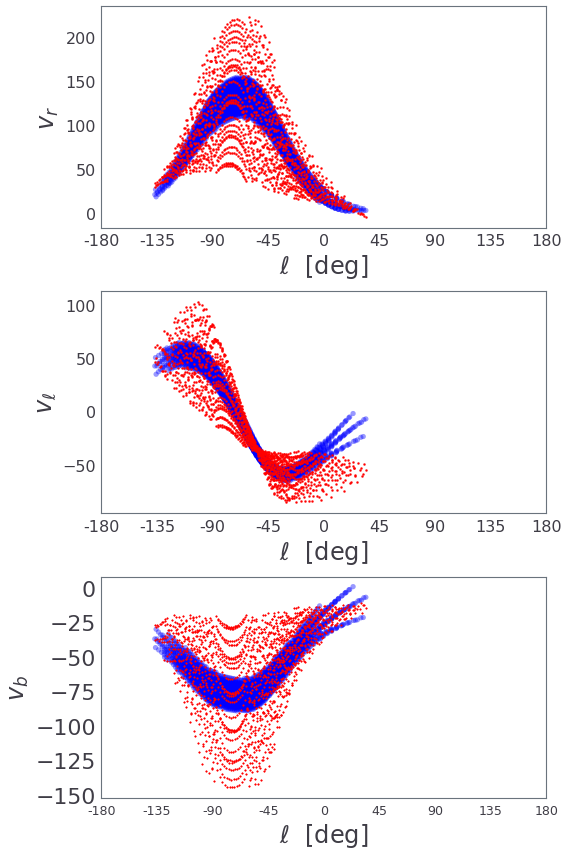

In [24]:
NNsteps = [5500,5800,6500,5500]
MCMCnewW = []
for j in range(4):
    MCMCnewW.append(oc.MCMCfit_extd(xxvvdds[j],xv_LSRs[j], Nsteps=NNsteps[j], Nwalkers=32))
    oc.plot_fit(MCMCnewW[-1])

In [14]:
ls /fs/nas14/other0/cbenitez/partsSim/

info_mp_marbles_14032021-122643
info_mp_marbles_15032021-003752
MCMCrun_mp_marbles_15032021-003752_newW.npy
MCMCrun_mp_marbles_15032021-003752_ringsW2.npy
MCMCrun_mp_marbles_15032021-003752_ringsW.npy
mp_marbles_14032021-122643
mp_marbles_14032021-122643LSR
mp_marbles_14032021-122643_script.py
mp_marbles_15032021-003752
mp_marbles_15032021-003752LSR
mp_marbles_15032021-003752_MCMCacumW.npy
mp_marbles_15032021-003752_script.py


In [16]:
MCMCnewW = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_newW.npy")

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5cc057710>,
       dtype=object))

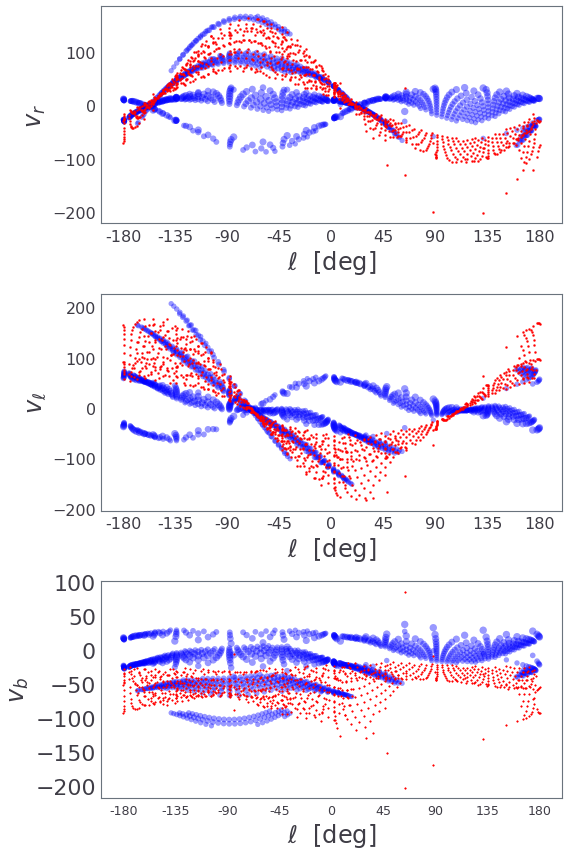

In [18]:
oc.plot_fit(MCMCnewW[1])

In [27]:
np.save("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_newW",MCMCnewW)
#np.save("MCMCrun_mp_marbles_15032021-003752",MCMCrun)

In [29]:
prue = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_newW.npy")

In [38]:
?oc.plot_walks

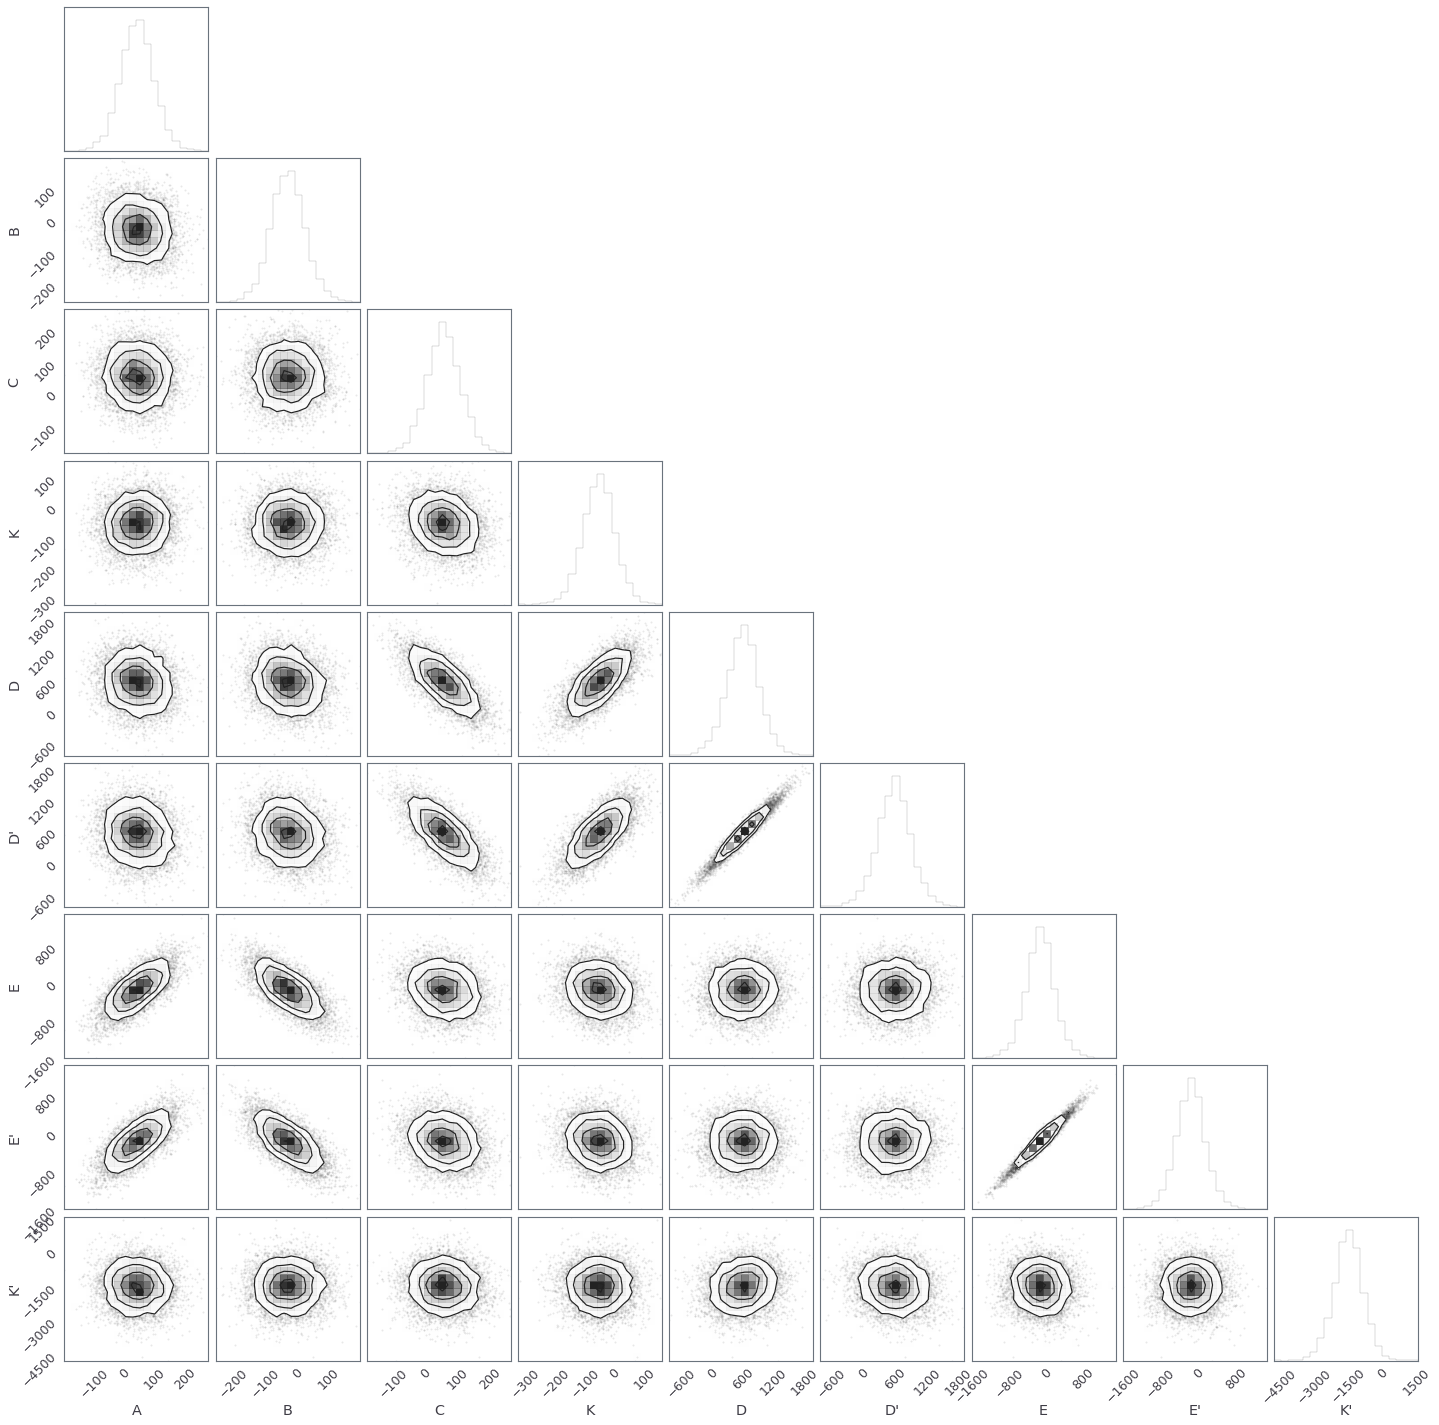

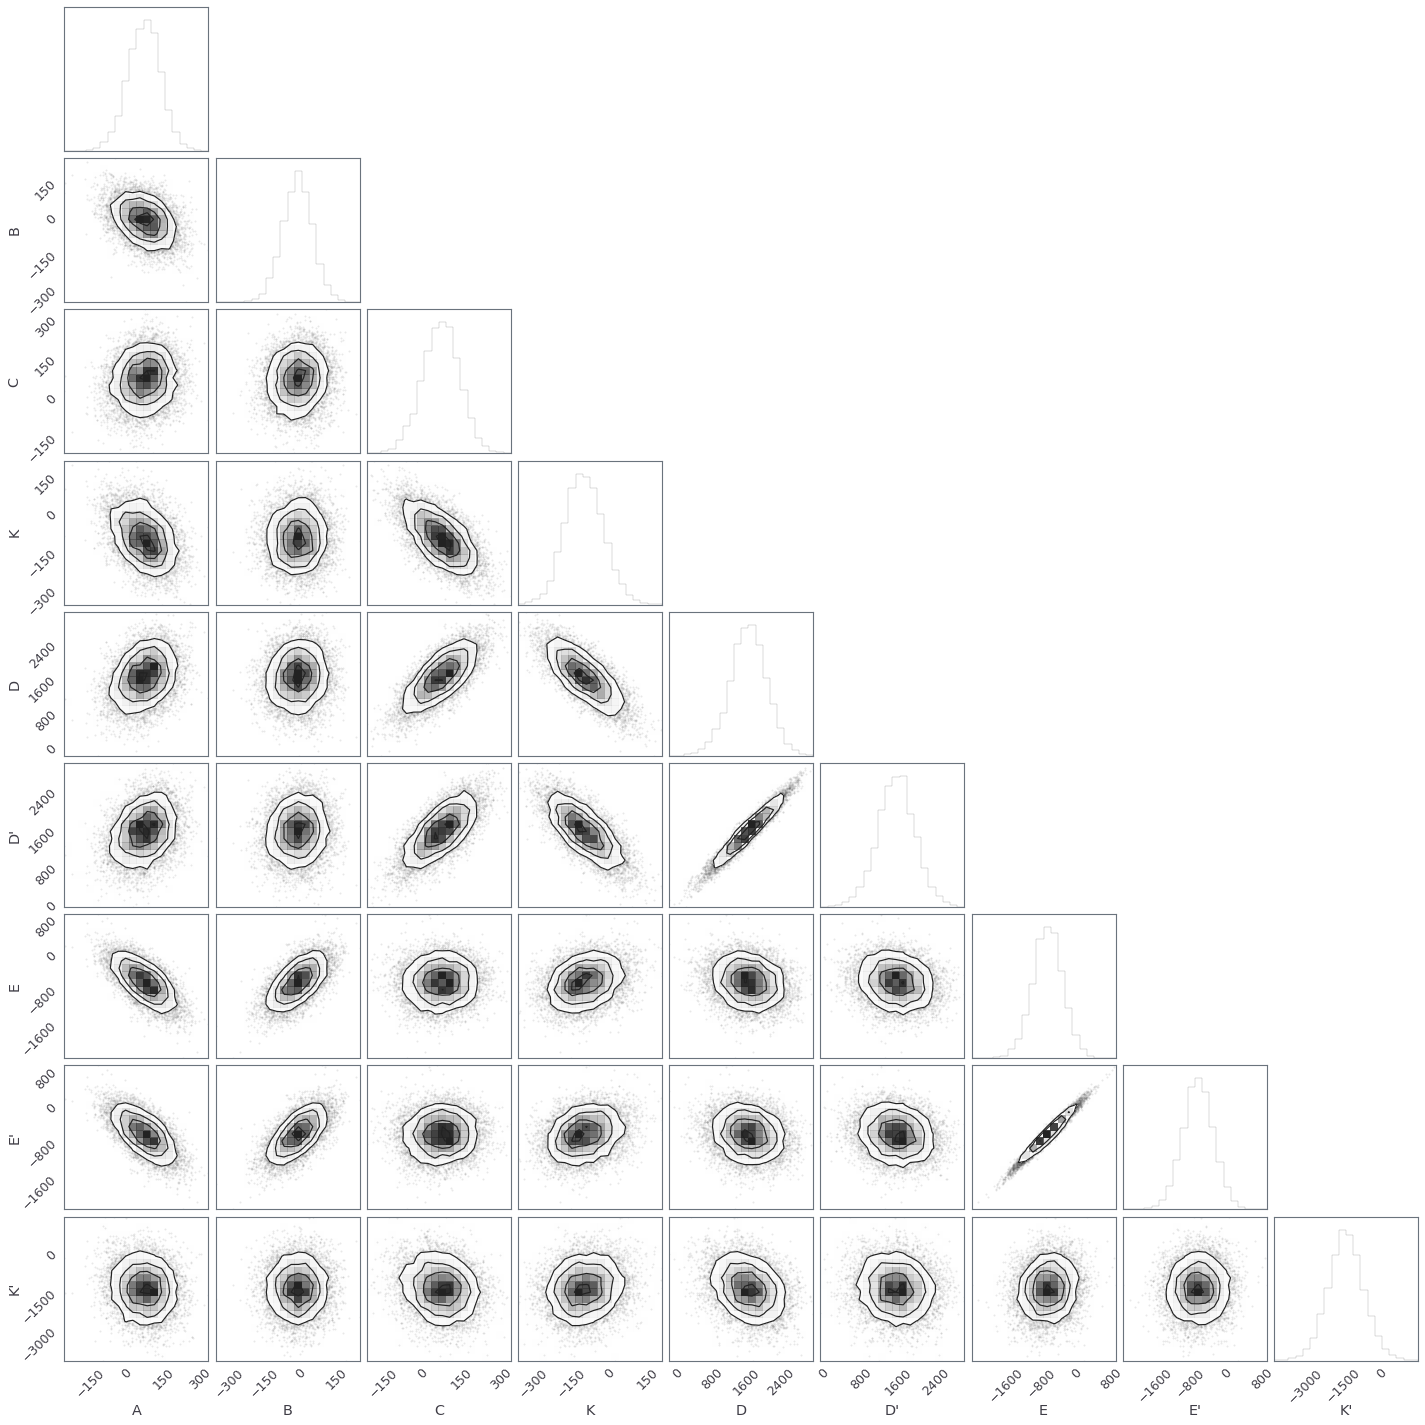

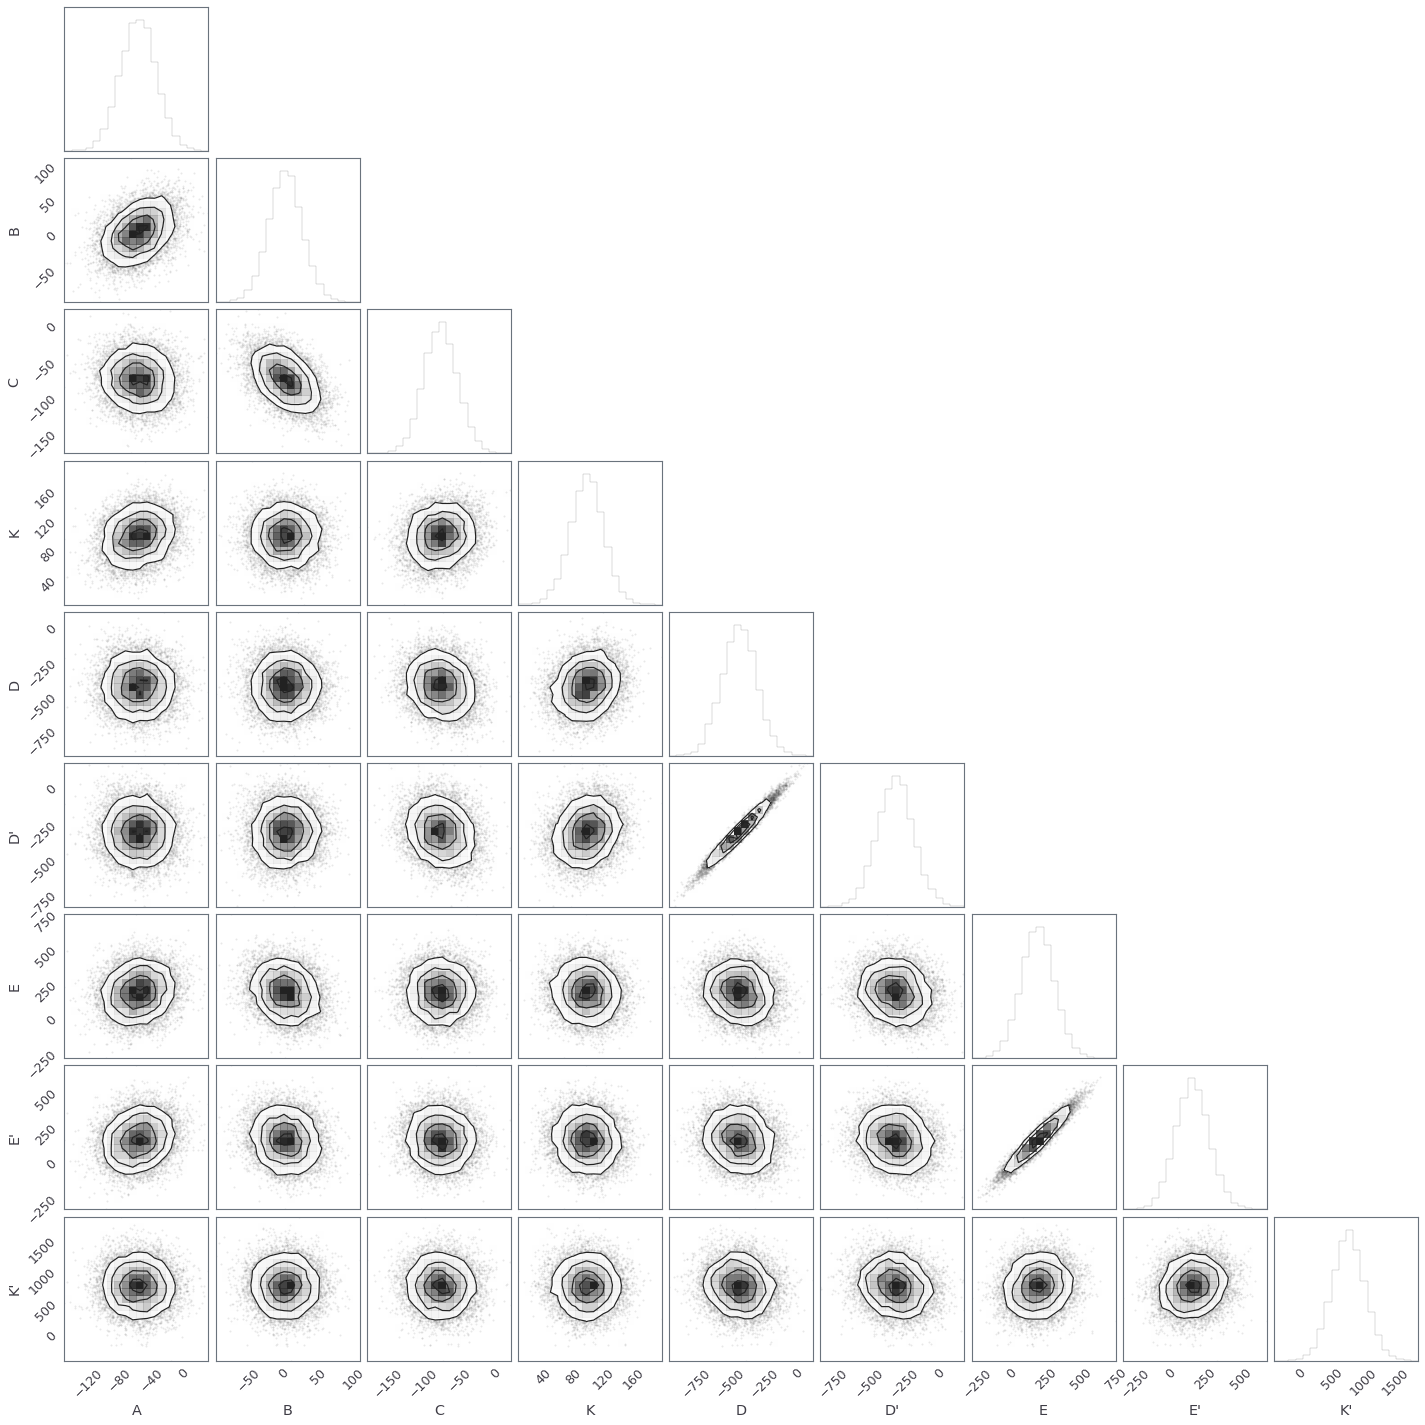

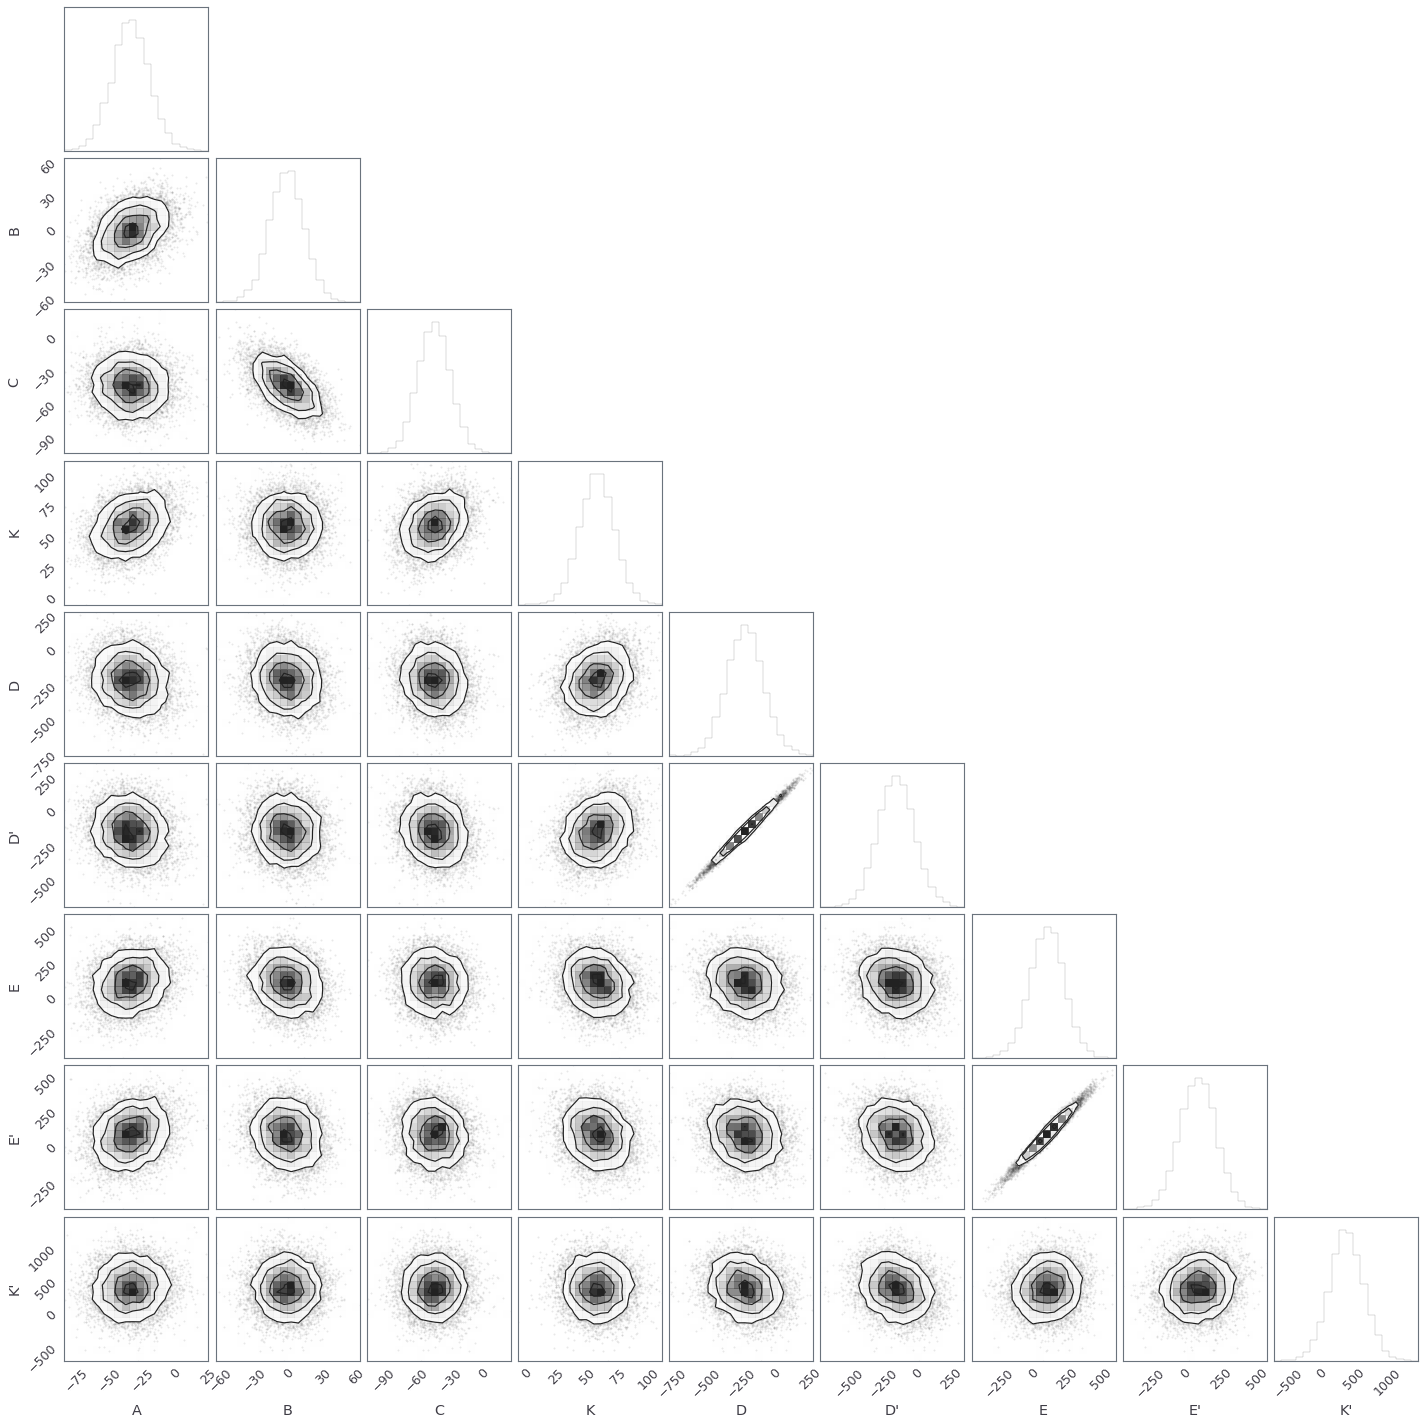

In [39]:
for p in prue:
    oc.plot_corner(p.sampler)

In [101]:
?MCMCrun.sampler.get_chain

In [106]:
def sample_walkers(MCMCrun,ivc):
    nsamples,flattened_chain = MCMCrun.Nwalkers*10, MCMCrun.sampler.get_chain(flat=True,discard=MCMCrun.burn_in)
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    fch = [oc.vr_model_ext,oc.vell_model_ext,oc.vb_model_ext][ivc]
    for i in thetas:
        mod = np.array([fch(c,i) for c in MCMCrun.cc_galac[MCMCrun.cc_galac[:,1].argsort()]])
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread

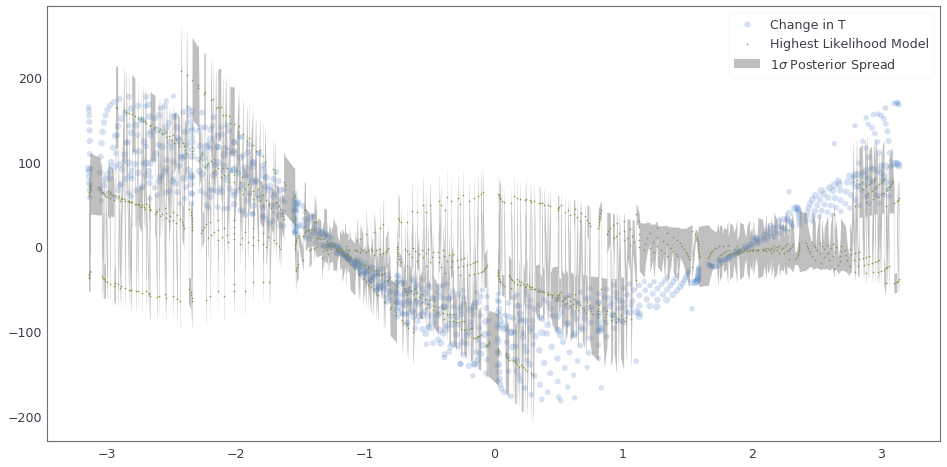

In [108]:
MCMCrun=prue[1]
ivc = 1
med_model, spread = sample_walkers(MCMCrun,ivc)

plt.figure(figsize=(16,8))
plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc],label='Change in T',s=MCMCrun.dd*10,alpha=.2)
plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=2)
plt.fill_between(MCMCrun.cc_galac[MCMCrun.cc_galac[:,1].argsort()][:,1],med_model-spread,med_model+spread,color='grey',alpha=0.5,label=r'$1\sigma$ Posterior Spread')
plt.legend()

______

In [19]:
tt[[0,1,2,3]]

array([3.25060325, 4.7216629 , 6.45561442, 7.98573204])

In [20]:
np.unique(DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.07)].creation_time)

NameError: name 'opc' is not defined

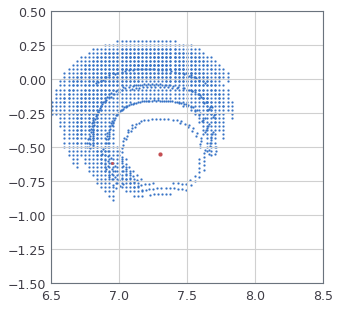

In [31]:
opc = 13
subDF = DFparts[(DFparts["output"]==opc) &\
                ((DFparts.creation_time==tt[0]) |
                 (DFparts.creation_time==tt[1]) |
                 (DFparts.creation_time==tt[2]) |
                 (DFparts.creation_time==tt[3])) &\
                (abs(DFparts.z)<.07)]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF.x,subDF.y,s=4)
plt.scatter(DFlsrs[DFlsrs.output==opc].x,DFlsrs[DFlsrs.output==opc].y,s=8,c="r")
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(6.5,8.5)
plt.ylim(-1.5,.5)
plt.grid(True)
plt.show()

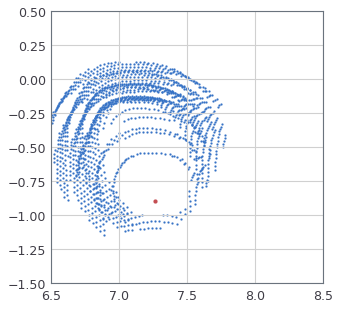

In [32]:
opc = 14
#itc = 14-11
array_ids = np.array(subDF.id)
subDF2 = DFparts[(DFparts["output"]==opc)]
subDF2 = subDF2[[i in array_ids for i in subDF2.id]]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF2.x,subDF2.y,s=4)
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(6.5,8.5)
plt.ylim(-1.5,.5)
plt.grid(True)
plt.show()

In [33]:
subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [12,13,14]]
for j in range(3):
    subDFs[j] = subDFs[j][[i in array_ids for i in subDFs[j].id]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

#subDFs = [DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]
##subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]
#xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
#print [len(xvd)  for xvd in xxvvdds]

[334, 1681, 1681]


In [34]:
ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(3):
    xv_LSR = xv_LSRs[ic+1]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

In [35]:
NNsteps = [5500,5800,6500,5500]
MCMCringsW = []
for j in range(3):
    MCMCringsW.append(oc.MCMCfit_extd(xxvvdds[j],xv_LSRs[j+1], Nsteps=5500, Nwalkers=32))

100%|██████████| 5500/5500 [13:52<00:00,  6.37it/s]


[A,B,C,K,D,D',E,E',K']: [27.56976899508218, -27.279761771781804, 39.984212986742556, -43.67904192647621, 1157.968819186772, 1105.3850954757938, -446.4916514388901, -453.03181524108214, -963.4803816780726]


100%|██████████| 5500/5500 [44:31<00:00,  2.16it/s]


[A,B,C,K,D,D',E,E',K']: [-57.690526674287895, -0.6598194184674939, -74.25870098566502, 97.12533623284024, -401.7235469771762, -292.063723532241, 170.75586321800742, 139.93477153719013, 587.1491434852677]


100%|██████████| 5710/5710 [46:04<00:00,  1.91it/s]


[A,B,C,K,D,D',E,E',K']: [-21.548585613693852, -9.042519382543816, -27.308777400918917, 34.687142262032346, -251.6067012731007, -208.5684020459965, 143.315644059317, 144.53853590617518, 600.5280137710611]


In [37]:
np.save("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_ringsW.npy",MCMCringsW)

In [38]:
MCMCringsWs = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_ringsW.npy")

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe578754390>,
       dtype=object))

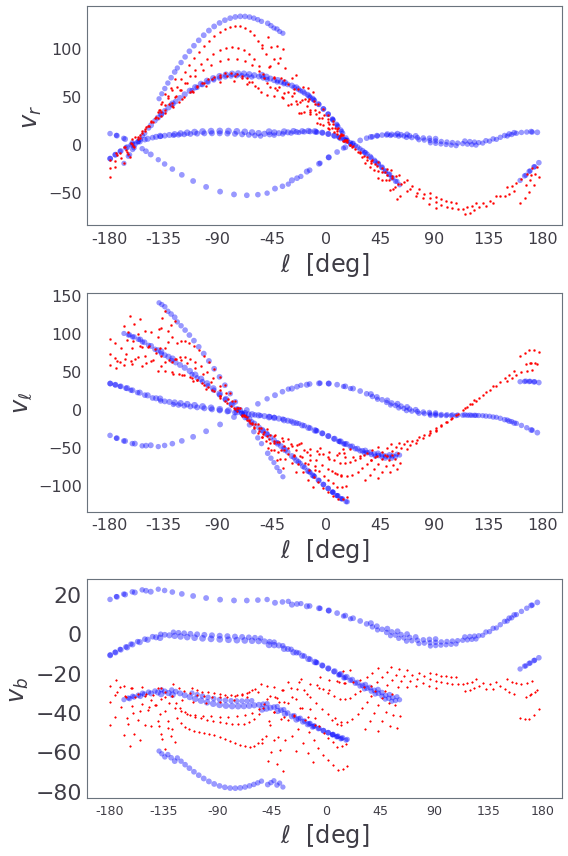

In [78]:
oc.plot_fit(MCMCringsWs[0])

(-1.5499999997820453, 0.4500000002179547)

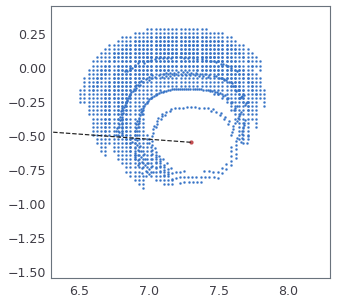

In [77]:
inc=1
plt.figure(figsize=(5,5))
plt.scatter(MCMCringsWs[inc].cc[:,0],MCMCringsWs[inc].cc[:,1],s=5)
plt.scatter([xv_LSRs[inc+1][0]],[xv_LSRs[inc+1][1]],s=16,c="r")
plt.plot([xv_LSRs[inc+1][0],0],[xv_LSRs[inc+1][1],0],linestyle="--",c="k")
plt.xlim(xv_LSRs[inc+1][0]-1,xv_LSRs[inc+1][0]+1)
plt.ylim(xv_LSRs[inc+1][1]-1,xv_LSRs[inc+1][1]+1)

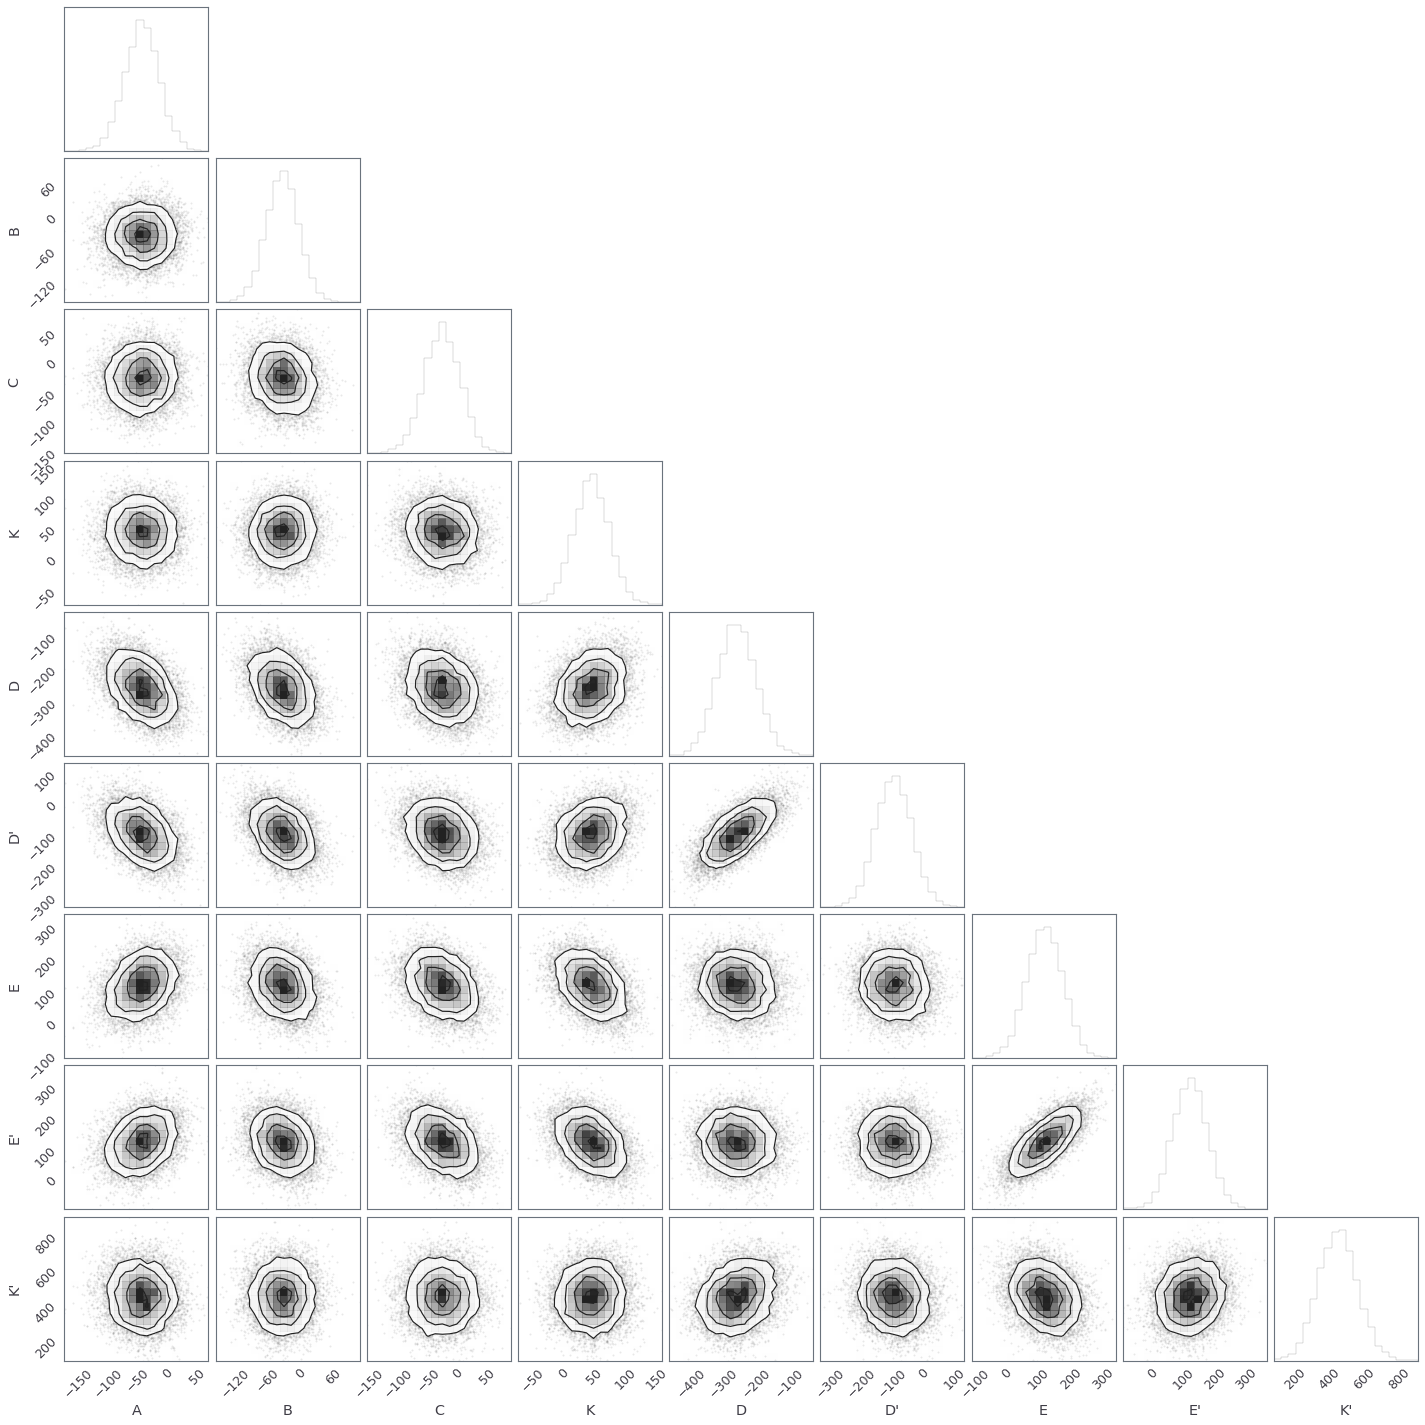

In [212]:
oc.plot_corner(MCMCringsW[2].sampler)

______

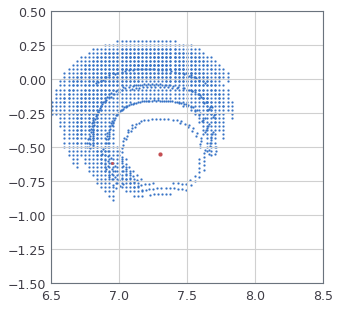

In [22]:
opc = 13
subDF = DFparts[(DFparts["output"]==opc) &\
                ((DFparts.creation_time==tt[0]) |
                 (DFparts.creation_time==tt[1]) |
                 (DFparts.creation_time==tt[2]) |
                 (DFparts.creation_time==tt[3])) &\
                (abs(DFparts.z)<.07)]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF.x,subDF.y,s=4)
plt.scatter(DFlsrs[DFlsrs.output==opc].x,DFlsrs[DFlsrs.output==opc].y,s=8,c="r")
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(6.5,8.5)
plt.ylim(-1.5,.5)
plt.grid(True)
plt.show()

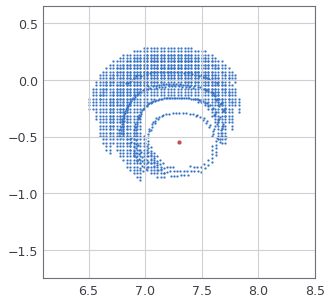

In [23]:
opc = 13
#itc = 14-11
array_ids = np.array(subDF.id)
subDF2 = DFparts[(DFparts["output"]==opc)]
subDF2 = subDF2[[i in array_ids for i in subDF2.id]]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF2.x,subDF2.y,s=4)
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(xv_LSRs[opc-11][0]-1.2,xv_LSRs[opc-11][0]+1.2)
plt.ylim(xv_LSRs[opc-11][1]-1.2,xv_LSRs[opc-11][1]+1.2)
plt.grid(True)
plt.show()

In [24]:
subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [12,13,14]]
array_ids = np.array(subDFs[1].id)
for j in range(3):
    subDFs[j] = subDFs[j][[i in array_ids for i in subDFs[j].id]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

#subDFs = [DFparts[(DFparts["output"]==opc) & (abs(DFparts.z)<.1)] for opc in [11,12,13,14]]
##subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [11,12,13,14]]
#xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
#print [len(xvd)  for xvd in xxvvdds]

[1040, 3317, 3317]


In [25]:
ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(3):
    xv_LSR = xv_LSRs[ic+1]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

100%|██████████| 6500/6500 [37:21<00:00,  2.97it/s]


[A,B,C,K,D,D',E,E',K']: [89.59369948685986, -16.3033928938491, 91.09487089141295, -121.9298844167824, 1682.107637710346, 1581.574422472617, -670.5518957835429, -645.2794682177217, -1344.1699838995285]


100%|██████████| 6500/6500 [1:19:31<00:00,  1.18it/s]


[A,B,C,K,D,D',E,E',K']: [-54.650176897223645, 0.5993349797087347, -72.1570812906878, 90.14608850205678, -319.569352639633, -202.1785036948812, 145.3692642972167, 122.86116069234228, 661.6424771166241]


100%|██████████| 6500/6500 [1:19:05<00:00,  1.25it/s]


[A,B,C,K,D,D',E,E',K']: [-37.36195029838913, -8.087786924461732, -40.69559459364029, 44.49377170935928, -142.58378625354868, -92.00258127036867, 81.79016844227903, 86.76520614887043, 549.5459556913219]


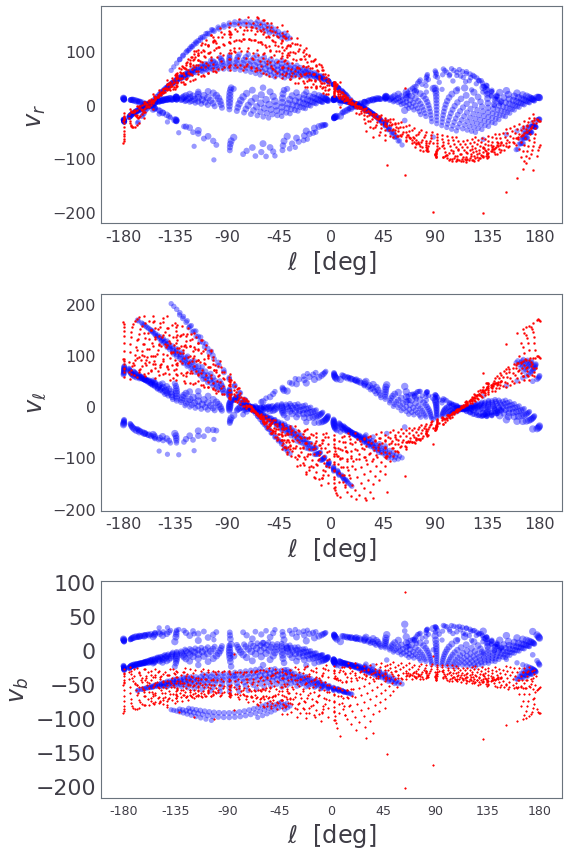

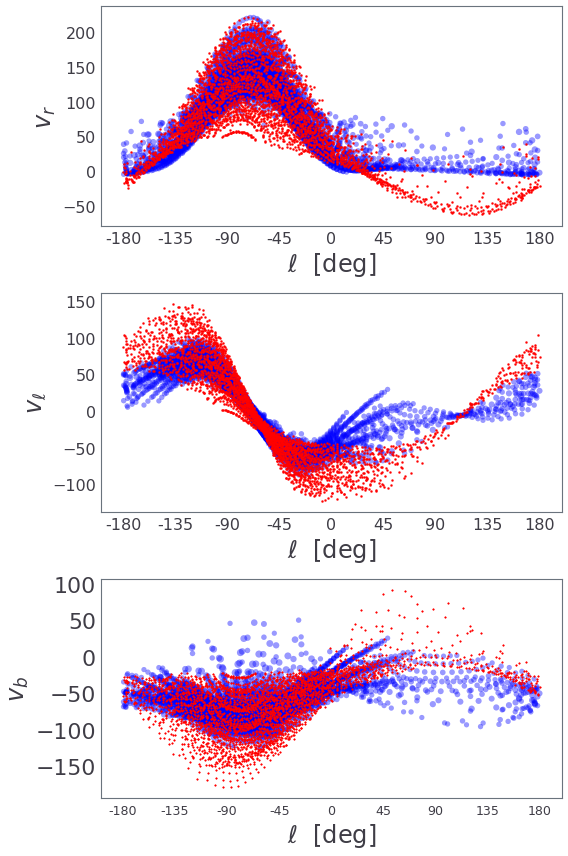

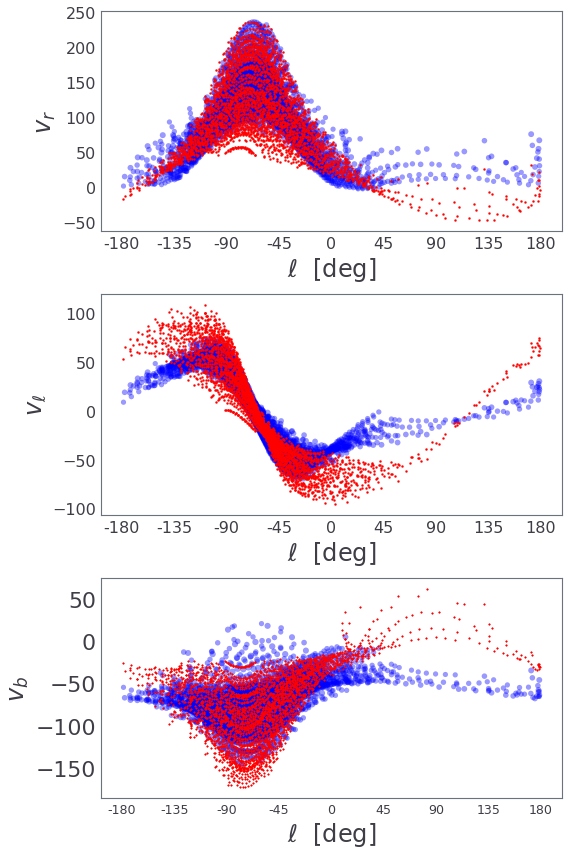

In [26]:
NNsteps = [5500,5800,6500,5500]
MCMCringsW = []
for j in range(3):
    MCMCringsW.append(oc.MCMCfit_extd(xxvvdds[j],xv_LSRs[j+1], Nsteps=6500, Nwalkers=32))
    oc.plot_fit(MCMCringsW[-1])

In [30]:
np.save("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_ringsW2",MCMCringsW)
#np.save("MCMCrun_mp_marbles_15032021-003752",MCMCrun)

In [31]:
MCMCringsW2 = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_ringsW2.npy")
MCMCringsW = np.load("/fs/nas14/other0/cbenitez/partsSim/MCMCrun_mp_marbles_15032021-003752_ringsW.npy")

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23cbd93990>,
       dtype=object))

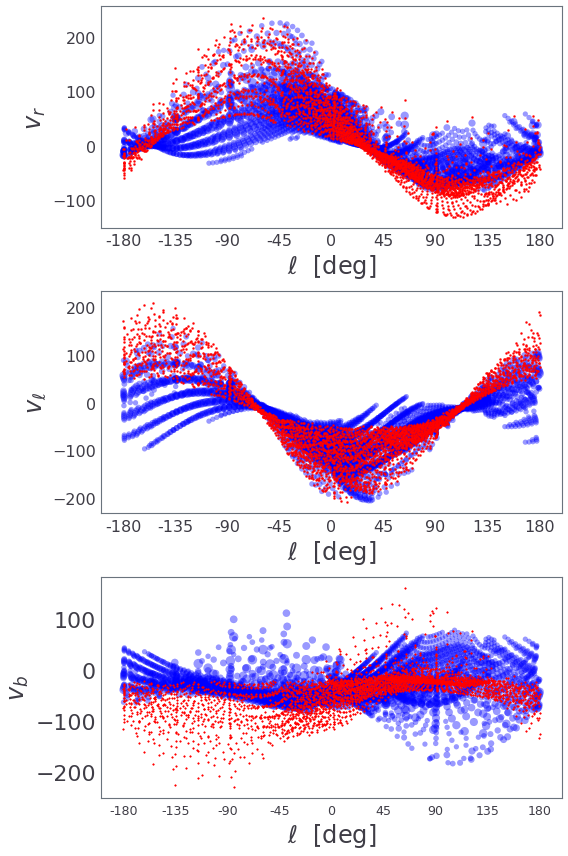

In [38]:
oc.plot_fit(MCMCringsW[1])

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23cbf7ba50>,
       dtype=object))

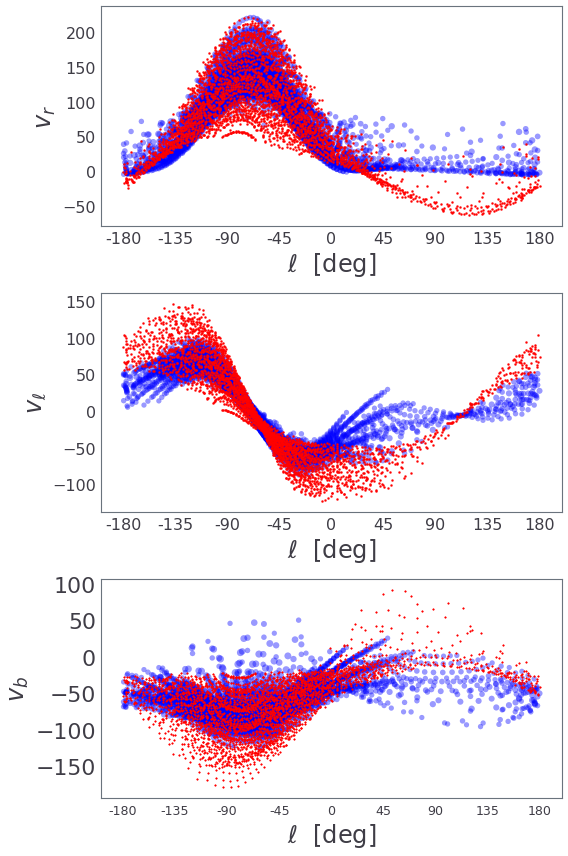

In [37]:
oc.plot_fit(MCMCringsW2[1])